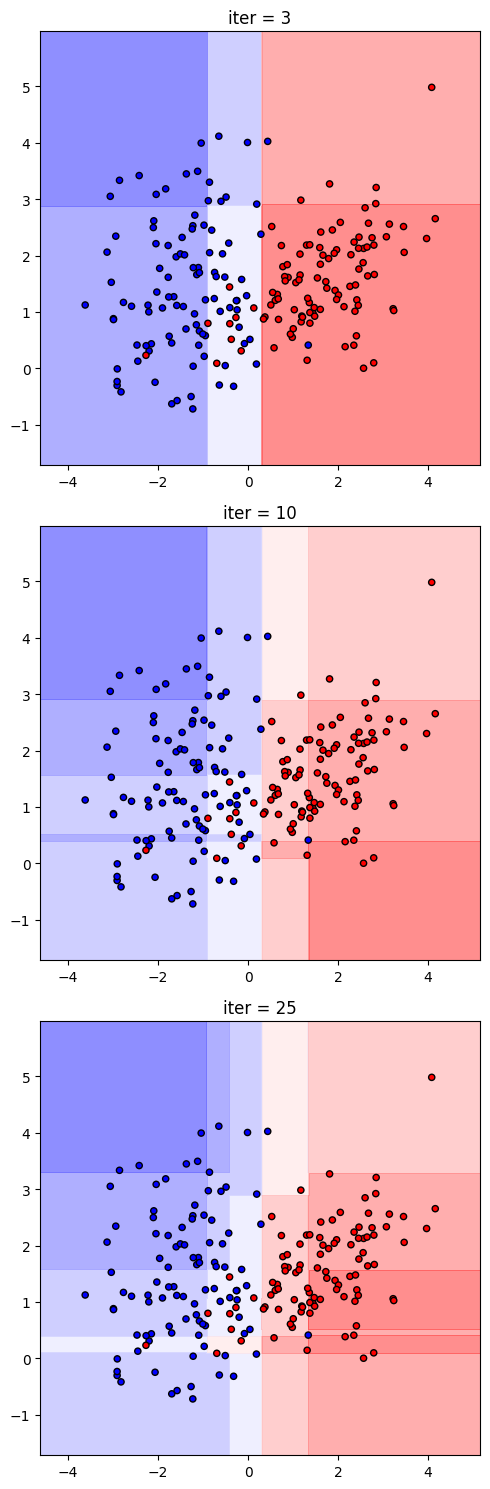

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.5, 0.5], class_sep=1.5, random_state=42)

# Convert the labels from {0, 1} to {-1, 1}
y = 2 * y - 1

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=25)

bdt.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plotting the iterations
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
for i, n_tree in enumerate([2, 9, 24], start=1):
    Z = bdt.staged_decision_function(np.c_[xx.ravel(), yy.ravel()])
    # Get the decision function for the n-th tree
    for j in range(n_tree + 1):
        Z_stage = next(Z)
    Z_stage = Z_stage.reshape(xx.shape)

    axs[i-1].contourf(xx, yy, Z_stage, cmap='bwr', alpha=0.5)
    axs[i-1].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=20)
    axs[i-1].set_title(f'iter = {n_tree + 1}')
    axs[i-1].set_xlim(xx.min(), xx.max())
    axs[i-1].set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


In [2]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import numpy as np

# Create a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.5, 0.5], class_sep=1.5, random_state=42)

# Convert the labels from {0, 1} to {-1, 1}
y = 2 * y - 1

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=30)
bdt.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Setup figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Initialize the contour plot with the first iteration
Z = bdt.staged_decision_function(np.c_[xx.ravel(), yy.ravel()])
contour = ax.contourf(xx, yy, next(Z).reshape(xx.shape), cmap='bwr', alpha=0.5)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=20, edgecolor='k')
title = ax.set_title('iter = 1')

# Animation function: this is called sequentially
def animate(i):
    ax.clear()
    Z = bdt.staged_decision_function(np.c_[xx.ravel(), yy.ravel()])
    for j in range(i + 1):
        decision_function = next(Z)
    contour = ax.contourf(xx, yy, decision_function.reshape(xx.shape), cmap='bwr', alpha=0.5)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=20, edgecolor='k')
    title = ax.set_title(f'iter = {i + 1}')
    return contour, scatter, title

# Create the animation object
anim = FuncAnimation(fig, animate, frames=30, repeat=False)

# Save the animation as a GIF file
gif_path = "adaBoost_animation.gif"
anim.save(gif_path, writer='imagemagick', fps=2)

# Close the plot to prevent it from displaying statically
plt.close()


In [5]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
clf_discrete = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                  n_estimators=50,
                                  algorithm='SAMME')
clf_real = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=50,
                              algorithm='SAMME.R')
reg_gentle = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                               n_estimators=50,
                               loss='linear')
clf_basic = AdaBoostClassifier(n_estimators=50)

# Fit models
clf_discrete.fit(X_train, y_train)
clf_real.fit(X_train, y_train)
reg_gentle.fit(X_train, y_train)
clf_basic.fit(X_train, y_train)

# Predict and evaluate
discrete_pred = clf_discrete.predict(X_test)
real_pred = clf_real.predict(X_test)
gentle_pred = reg_gentle.predict(X_test)
basic_pred = clf_basic.predict(X_test)

# Convert predictions to binary outcomes for gentle AdaBoost
gentle_pred_binary = [1 if y >= 0.5 else -1 for y in gentle_pred]

# Calculate accuracies
discrete_accuracy = accuracy_score(y_test, discrete_pred)
real_accuracy = accuracy_score(y_test, real_pred)
gentle_accuracy = accuracy_score(y_test, gentle_pred_binary)
basic_accuracy = accuracy_score(y_test, basic_pred)

# Compile the results
model_performance = {
    "Discrete AdaBoost": discrete_accuracy,
    "Real AdaBoost": real_accuracy,
    "Gentle AdaBoost (approx)": gentle_accuracy,
    "Basic AdaBoost": basic_accuracy
}

model_performance



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Discrete AdaBoost': 0.875,
 'Real AdaBoost': 0.87,
 'Gentle AdaBoost (approx)': 0.47,
 'Basic AdaBoost': 0.87}